# Analysis of data from public WhatsApp groups
Exploration and visualization of the data set

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import unicodedata, re, itertools, sys
from urllib.request import urlopen
import json
import plotly.express as px
import emoji, re, string, time, os, pickle

from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
# pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_colwidth', 200)
sns.set(style="darkgrid")

In [216]:
base = '2020'
show = False
preprocessed = False

In [126]:
data_dir = 'data/' + str(base) #+ '/vis_processed_texts.p'
for filename in os.listdir(data_dir):
    #print(filename)
    if filename == 'vis_processed_texts.p':
        preprocessed = True
preprocessed        

True

In [127]:
#filepath = data_dir + '/fakeWhatsApp.BR_' + str(base) + '.csv'
#df = pd.read_csv(filepath)  #('data/2020/wpp_2020_stage1.csv')
df = pd.read_csv('/home/cabral/Documents/FakeWhatsApp.Br private data/data/2020/wpp_2020_stage1.csv')
df.head(5)

,id,date,hour,ddi,country,country_iso3,ddd,state,group,midia,url,characters,words,viral,sharings,text
0,146759200457638065,07/04/20,04:07,55,BRASIL,BRA,21,Rio de Janeiro,2020_1,0,0,9,1,0,1,Morreram?
1,146759200457638065,07/04/20,04:07,55,BRASIL,BRA,21,Rio de Janeiro,2020_1,0,0,24,4,0,1,"Olá novato, se apresente"
2,5788106393468158140,07/04/20,04:07,55,BRASIL,BRA,21,Rio de Janeiro,2020_1,0,0,9,2,0,1,há tempos
3,146759200457638065,07/04/20,04:07,55,BRASIL,BRA,21,Rio de Janeiro,2020_1,0,0,13,2,0,1,Legião Urbana
4,5788106393468158140,07/04/20,04:13,55,BRASIL,BRA,21,Rio de Janeiro,2020_1,0,0,6,1,0,1,Indios


In [128]:
# IF NOT LABELLED YET
try:
    mis = df['misinformation']
except:
    df['misinformation'] = [0]*len(df)

# "Trava-Zap"

In [129]:
# messages with a lot of repeated words. The number of unique words for word in text should be low
df['unique words'] = [len(set(t.split())) for t in df['text']]
df['unique words/words'] = df['unique words']/df['words']
#df['unique chars'] = [len(set(t)) for t in df['text']]
#df['unique chars/total chars'] = df['unique chars']/df['characters']
#sns.distplot(df['unique chars/total chars'])

In [130]:
# Groups Trava-Zap
# '2020_222', '2020_19', '2020_31'
#examples
travazap = df[(df['unique words/words']<0.05)]
print(len(travazap))
travazap[['unique words/words','text']].head()

207


,unique words/words,text
4648,0.001182,~*🏴☠🖕🏽🏴☠ ࿓†لَــــزَ ـ͜ـْْْـ͡ـ﴿خٌ﴾͜ــ͡ــ وُرَ†࿐🏴☠🖕🏽🏴☠.cc*~\n~*🏴☠🖕🏽🏴☠ ࿓†لَــــزَ ـ͜ـْْْـ͡ـ﴿خٌ﴾͜ــ͡ــ وُرَ†࿐🏴☠🖕🏽🏴☠.cc*~\n~*🏴☠🖕🏽🏴☠ ࿓†لَــــزَ ـ͜ـْْْـ͡ـ﴿خٌ﴾͜ــ͡ــ وُرَ†࿐🏴☠🖕🏽🏴☠.cc*~\n~*🏴☠🖕🏽🏴☠ ࿓†لَــــزَ...
4650,0.003259,7⃣6⃣9⃣~҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉⃟҉I ҉...
13912,0.004470,🔥 *ıllıllı[DOUNT] ıllıllı*🔥\n ...
13913,0.004470,🔥 *ıllıllı[DOUNT] ıllıllı*🔥\n ...
13915,0.004470,🔥 *ıllıllı[DOUNT] ıllıllı*🔥\n ...


In [131]:
# remove trava-zap
# df = df.drop(df[<some boolean condition>].index)
df = df.drop(df[(df['unique words/words']<0.05)].index)

# Basic statistics

In [132]:
df.describe()[['characters','words','sharings']]

,characters,words,sharings
count,228061.000000,228061.000000,228061.000000
mean,106.861607,13.985688,1.659806
std,1039.588257,121.101420,4.639387
min,1.000000,1.000000,1.000000
25%,12.000000,2.000000,1.000000
50%,25.000000,4.000000,1.000000
75%,28.000000,5.000000,1.000000
max,65536.000000,10483.000000,123.000000


In [133]:
#df = df[df['words'] < 4000]
#df.describe()[['characters','words','sharings']]

In [134]:
total_msg = len(df)
total_groups = len(df['group'].unique())
total_users = len(df['id'].unique())
print('Total groups analyzed: ',total_groups)
print('Total unique users: ', total_users)
print('Total messages: ', total_msg)
print('Message/user ratio: ', total_msg/len(df['id'].unique()))

Total groups analyzed:  236
Total unique users:  10495
Total messages:  228061
Message/user ratio:  21.73044306812768


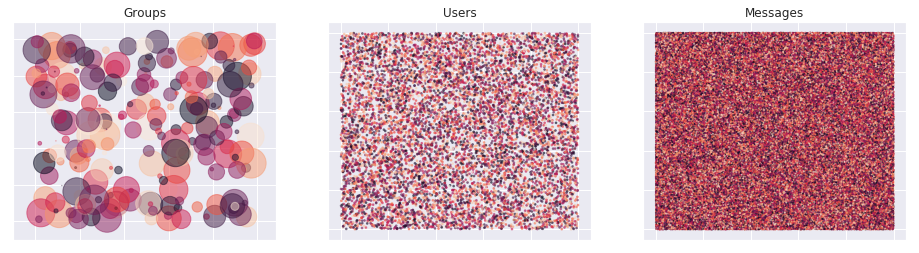

In [135]:
#Visualization of scale
# Fixing random state for reproducibility
np.random.seed(42)

plt.figure(figsize=(16, 4))

### grupos
N = total_groups
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.subplot(131)
plt.title('Groups')
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####users
N = total_users
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(132)
plt.title('Users')
plt.scatter(x, y, s=3, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

#####msgs
N = total_msg
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.subplot(133)
plt.title('Messages')
plt.scatter(x, y, s=1, c=colors, alpha=0.5)
plt.tick_params(
    axis = 'both',
    left = False,
    right = False,
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft = False) # labels along the bottom edge are off

plt.show()

## Proportions

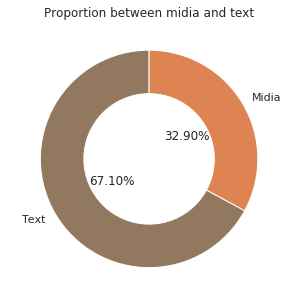

In [136]:
# midia and text
#plt.style.use('default')
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between midia and text')
x = [len(df[df['midia']==0]),len(df[df['midia']==1])]
names = ['Text','Midia']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C5','C1'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

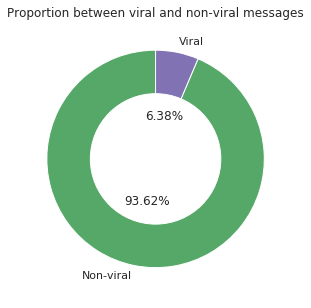

In [137]:
#sharings
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between viral and non-viral messages')
x = [len(df[df['viral']==0]),len(df[df['viral']==1])]
names = ['Non-viral','Viral']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C4'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

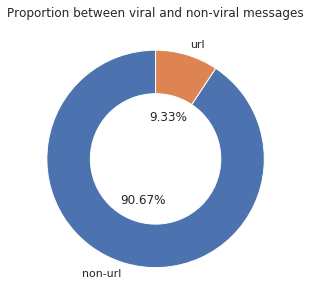

In [138]:
#sharings
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion between viral and non-viral messages')
x = [len(df[df['url']==0]),len(df[df['url']==1])]
names = ['non-url','url']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C1'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [139]:
#misinformation
#plt.style.use('bmh')
# plt.figure(figsize=(5, 5))
# plt.title('Proportion of misinformation')
# x = [len(df[df['misinformation']==0]),len(df[df['misinformation']==1])]
# names = ['Non-misinformation','Misinformation']
# my_circle=plt.Circle( (0,0), 0.6, color='white')
# plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C3'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()

# Misinformation statistics

In [140]:
# # samples
# print('misinformation\n')
# m_list = (list(df[df['misinformation']==1]['text'].sample(n=3, random_state=42)))
# for m in m_list:
#     print(m)
#     print('******')
# print()

# print('non-misinformation\n')
# m_list = (list(df[(df['misinformation']==0) & (df['midia']==0)]['text'].sample(n=3, random_state=42)))
# for m in m_list:
#     print(m)
#     print()
# print()

In [141]:
# plt.figure(figsize=(20, 8))
# plt.title('words')
# sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 1)]['words'], hist = False, kde = True, label = 'misinformation')
# sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 0)]['words'], hist = False, kde = True, label = 'non misinformation')
# plt.show()

In [142]:
# plt.figure(figsize=(20, 8))
# plt.title('characters')
# sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 1)]['characters'], hist = False, kde = True, label = 'misinformation')
# sns.distplot(df[(df['midia'] == 0) & (df['misinformation'] == 0)]['characters'], hist = False, kde = True, label = 'non misinformation')
# plt.show()

In [143]:
# plt.figure(figsize=(5, 5))
# plt.title('Proportion of url in misinformation')

# not_url = len(df[(df['url']==0) & (df['misinformation']==1)])
# url = len(df[(df['url']==1) & (df['misinformation']==1)])
# x = [not_url,url]
# names = ['don\'t have url','have url']
# my_circle=plt.Circle( (0,0), 0.6, color='white')
# plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C0','C3'])
# p=plt.gcf()
# p.gca().add_artist(my_circle)
# plt.show()

# Geographic data

In [144]:
#plt.style.use('default')
df_br_states = df[(df['state'] != '?') & (df['state'] != 'Estrangeiro') ]
counts = df_br_states.groupby(by='state').count()['id'].sort_index(ascending=False)
user_counts = df_br_states.groupby('state')['id'].nunique().sort_index(ascending=False)
#non_mis_counts = df_br_states[df_br_states['misinformation'] == 0].groupby(by='state').count()['id'].sort_index(ascending=False) 
#misinformations_counts = df_br_states[df_br_states['misinformation'] == 1].groupby(by='state').count()['id'].sort_index(ascending=False) 
states = list(counts.index)
ratio = np.true_divide(counts.values,user_counts.values)
msg_by_state = pd.DataFrame({'state':states,
                             'total messages':counts.values,
                            'total unique users': user_counts.values,
                            'message/user ratio': ratio})
#mis_by_state.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')
msg_by_state

,state,total messages,total unique users,message/user ratio
0,Tocantins,3375,194,17.396907
1,São Paulo,49795,2045,24.349633
2,Sergipe,2322,103,22.543689
3,Santa Catarina,10105,315,32.079365
4,Roraima,1064,45,23.644444
5,Rondônia,1698,97,17.505155
6,Rio de Janeiro,19117,999,19.136136
7,Rio Grande do Sul,6111,324,18.861111
8,Rio Grande do Norte,5654,205,27.580488
9,Piauí,3446,156,22.089744


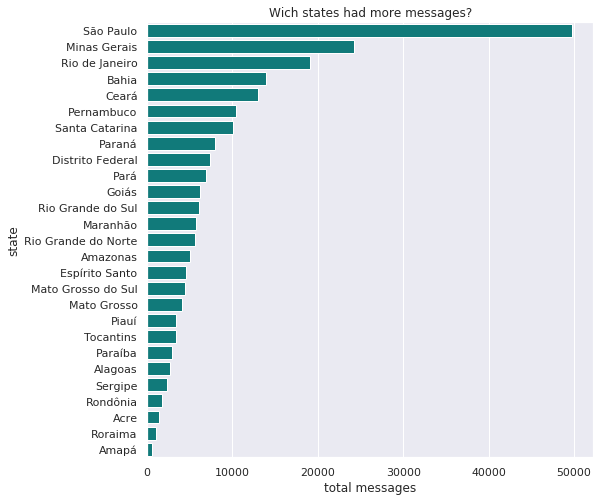

In [145]:
msg_by_state = msg_by_state.sort_values(by = 'total messages', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Wich states had more messages?')
sns.barplot(y='state',x='total messages', data = msg_by_state, color = 'darkcyan')
plt.show()

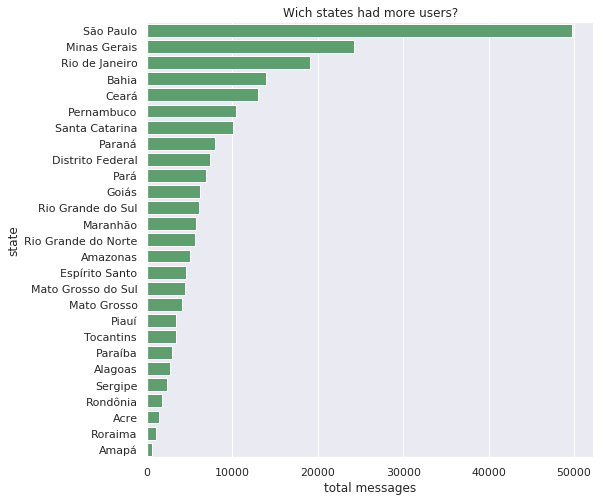

In [146]:
msg_by_state = msg_by_state.sort_values(by = 'total messages', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Wich states had more users?')
sns.barplot(y='state',x='total messages', data = msg_by_state, color = 'C2')
plt.show()

In [147]:
# t = 'misinformation by state'
# mis_by_state = mis_by_state.sort_values(by = 'misinformation', ascending = False)
# mis_by_state.loc[:,['non-misinformation', 'misinformation']].plot.bar(stacked=True, figsize=(10,7),title = t)

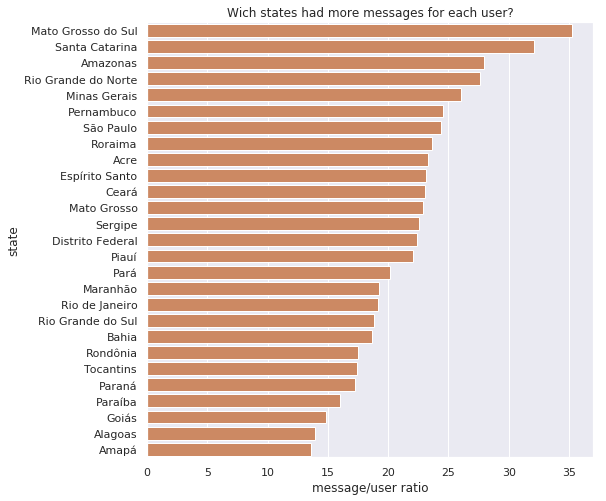

In [148]:
msg_by_state = msg_by_state.sort_values(by = 'message/user ratio', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Wich states had more messages for each user?')
sns.barplot(y='state', x ='message/user ratio', data = msg_by_state, color = 'C1')
plt.show()

### Maps

In [149]:
geobr = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
with urlopen(geobr) as response:
    geo_states = json.load(response)

In [218]:
#messages
fig = px.choropleth(msg_by_state, geojson = geo_states, locations='state',featureidkey="properties.name",
                           color='total messages',
                           color_continuous_scale="blues",
                           #range_color=(0, 0.07),
                           scope="south america",
                           labels={'ratio':'misinformation/message ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_messages_br_states.html")

if show:
    fig.show()

In [217]:
#ratio
fig = px.choropleth(msg_by_state, geojson = geo_states, locations='state',featureidkey="properties.name",
                           color='message/user ratio',
                           color_continuous_scale="oranges",
                           #range_color=(0, 0.07),
                           scope="south america",
                           labels={'ratio':'misinformation/message ratio'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_ratio_br_states.html")
if show:
    fig.show()

## Other countries

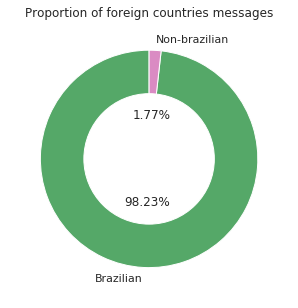

In [152]:
#misinformation
#plt.style.use('bmh')
plt.figure(figsize=(5, 5))
plt.title('Proportion of foreign countries messages')
x = [len(df[df['country']=='BRASIL']),len(df[df['country']!='BRASIL'])]
names = ['Brazilian','Non-brazilian']
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.pie(x, labels=names,autopct='%1.2f%%',startangle=90, pctdistance=0.4, colors = ['C2','C6'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [153]:
#plt.style.use('default')
df_foreign = df[(df['state'] == 'Estrangeiro')]
counts = df_foreign.groupby(by='country').count()['id'].sort_index(ascending=False)
user_counts = df_foreign.groupby('country')['id'].nunique().sort_index(ascending=False)
ratio = np.true_divide(counts.values,user_counts.values)

non_mis_counts = df_foreign[df_foreign['misinformation'] == 0].groupby(by='country').count()['id'].sort_index(ascending=False) 
misinformations_counts = df_foreign[df_foreign['misinformation'] == 1].groupby(by='country').count()['id'].sort_index(ascending=False) 
mis_dict = dict(misinformations_counts)
mis_keys = list(non_mis_counts.index)
mis_values = [mis_dict.get(m,0) for m in mis_keys]
mis_dict = dict(zip(mis_keys,mis_values))
misinformations_counts = pd.Series(mis_dict)

country2ISO3 = {
    'ESTADOS UNIDOS':'USA',
    'PORTUGAL':'PRT',
    'BRASIL':'BRA',
    'PAQUISTÃO':'PAK',
    'PARAGUAI':'PRY',
    'ESPANHA':'ESP',
    'ITÁLIA':'ITA',
    'ILHA DE MAN':'IMN',
    'ALEMANHA':'DEU',
    'SURINAME':'SUR',
    'VENEZUELA':'VEN',
    'FRANÇA':'FRA',
    'ILHAS COCOS (KEELING)':'CCK',
    'BOLÍVIA':'BOL',
    'ANGOLA':'AGO',
    'ARGENTINA':'ARG',
    'MARROCOS':'MAR',
    'RÚSSIA':'RUS',
    'NOVA ZELANDIA':'NZL',
    'ÍNDIA':'IND',
    'ÁFRICA DO SUL':'ZAF',
    'IÊMEN':'YEM',
    'EGITO':'EGY',
    'TURQUIA':'TUR',
    'MOÇAMBIQUE':'MOZ',
    'GUIANA':'GUY',
    'BENIM':'BEN',
    'COLÔMBIA':'COL',
    'BÉLGICA':'BEL',
    'PERU':'PER',
    'NORUEGA':'NOR',
    'ARÁBIA SAUDITA':'SAU',
    'SUIÇA':'CHE',
    'GANA':'GHA',
    'MÉXICO':'MEX',
    'CHILE':'CHL',
    'SÃO TOMÉ E PRÍNCIPE':'STP',
    'JAPÃO':'JPN',
    'IRÃ':'IRN',
    'INDONÉSIA':'IDN',
    'GUATEMALA':'GTM',
    'PAÍSES BAIXOS':'NLD',
    'SRI LANKA':'LKA',
    'EQUADOR':'ECU',
    'CABO VERDE':'CPV',
    'URUGUAI':'URY',
    'SUÉCIA':'SWE'
}
country = list(counts.index)
iso3 = [country2ISO3[c] for c in country]

#ratio = np.true_divide(misinformations_counts.values, counts.values)
mis_by_country = pd.DataFrame({'country':country,
                             'iso3': iso3, 
                             'total messages':counts.values,
                             'total unique users': user_counts.values,
                            'message/user ratio': ratio})

mis_by_country = mis_by_country.sort_values(by= 'total messages', ascending = False)
mis_by_country

,country,iso3,total messages,total unique users,message/user ratio
7,PORTUGAL,PRT,780,58,13.448276
25,ESTADOS UNIDOS,USA,673,42,16.023810
8,PERU,PER,337,19,17.736842
35,ANGOLA,AGO,295,45,6.555556
28,COLÔMBIA,COL,265,11,24.090909
21,ILHA DE MAN,IMN,265,13,20.384615
14,MÉXICO,MEX,240,21,11.428571
10,PARAGUAI,PRY,164,11,14.909091
32,BOLÍVIA,BOL,119,3,39.666667
34,ARGENTINA,ARG,97,8,12.125000


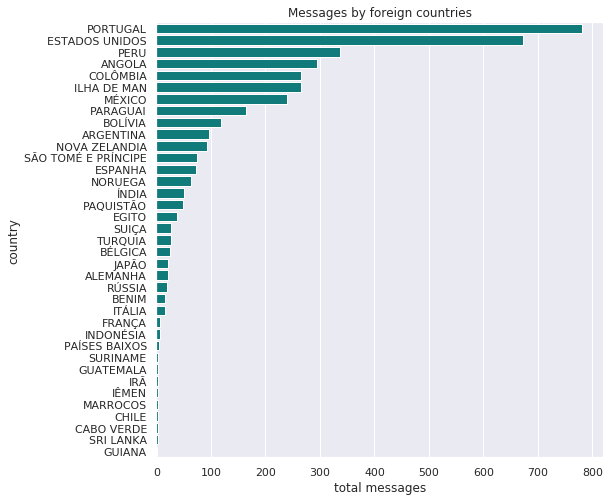

In [154]:
plt.figure(figsize=(8, 8))
plt.title('Messages by foreign countries')
sns.barplot(y='country',x='total messages', data = mis_by_country, color = 'darkcyan')
plt.show()

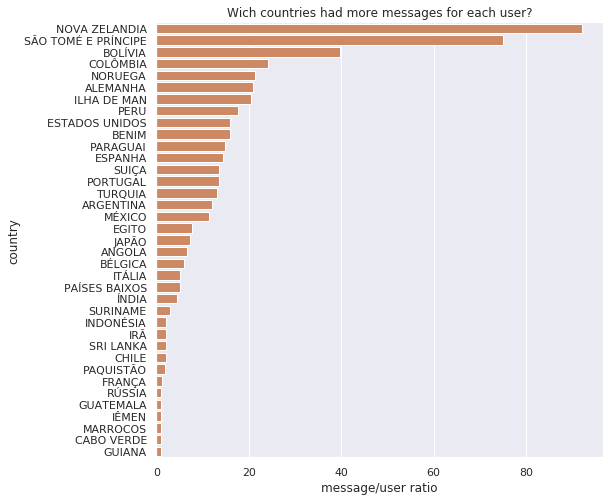

In [155]:
mis_by_country = mis_by_country.sort_values(by = 'message/user ratio', ascending = False)
plt.figure(figsize=(8, 8))
plt.title('Wich countries had more messages for each user?')
sns.barplot(y='country', x ='message/user ratio', data = mis_by_country, color = 'C1')
plt.show()

In [156]:
geo = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
with urlopen(geo) as response:
    geo_world = json.load(response)

In [157]:
geo_world['features'][0]['properties']

{'ADMIN': 'Aruba', 'ISO_A3': 'ABW', 'ISO_A2': 'AW'}

In [219]:
#total messages
fig = px.choropleth(mis_by_country, geojson = geo_world, locations='iso3',featureidkey="properties.ISO_A3",
                           color='total messages',
                           color_continuous_scale="algae",
                           #range_color=(0, 14),
                           #scope="south america",
                           labels={'total messages':'total messages'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("plots/"+str(base)+"/map_messages_world.html")
if show:
    fig.show()

# Time series analysis

In [159]:
def custom_time(data,hora):
    string = data + " " + hora
    return string
df['timestamp'] = df.apply(lambda x: custom_time(x['date'],x['hour']),axis=1)

In [160]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d/%m/%y %H:%M')
timeseries = df.groupby('timestamp').count()['id']
#timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization')
fig.show()

In [161]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')
timeseries = df.groupby('date').count()['id']
timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization by day')
fig.show()

In [162]:
df['hour'] = pd.to_datetime(df['hour'], format = '%H:%M' )
timeseries = df.groupby('hour').count()['id']
timeseries = timeseries.sort_index()
fig = px.line(x=timeseries.index, y=timeseries.values, title = 'Timeseries visualization by hour')
fig.show()

# Distribuitions

In [163]:
# probable fake news
#df[df['words']>4000][['text','unique words/words']]

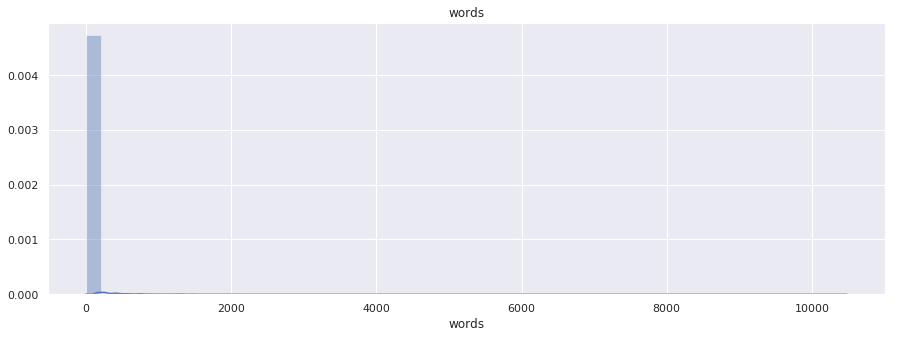

In [164]:
plt.figure(figsize=(15, 5))
plt.title('words')
sns.distplot(df[df['midia'] == 0]['words'], rug = False, kde = True)
plt.show()

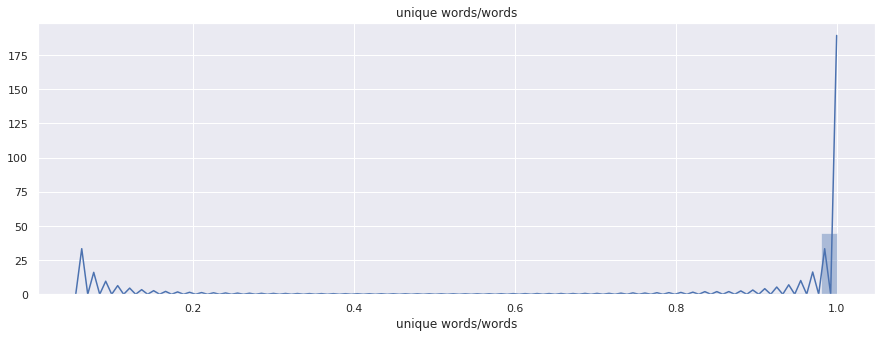

In [165]:
plt.figure(figsize=(15, 5))
plt.title('unique words/words')
sns.distplot(df[df['midia'] == 0]['unique words/words'], rug = False, kde = True)
plt.show()

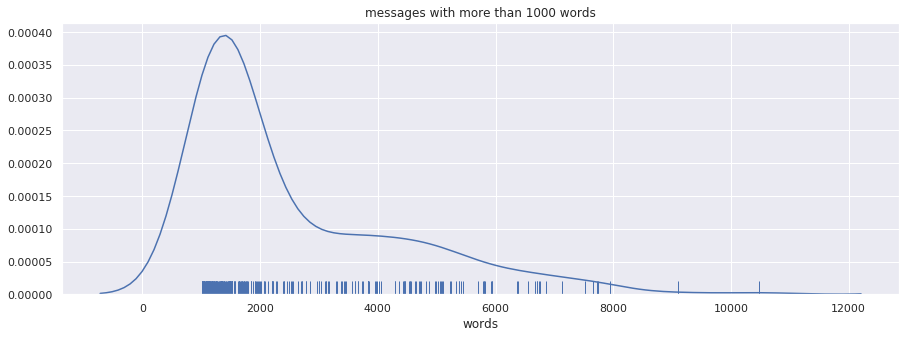

In [166]:
plt.figure(figsize=(15, 5))
plt.title('messages with more than 1000 words')
sns.distplot(df[(df['midia'] == 0) & (df['words'] > 1000)]['words'], hist = False, rug = True, kde = True)
#plt.show()

In [167]:
# Distribuition name??

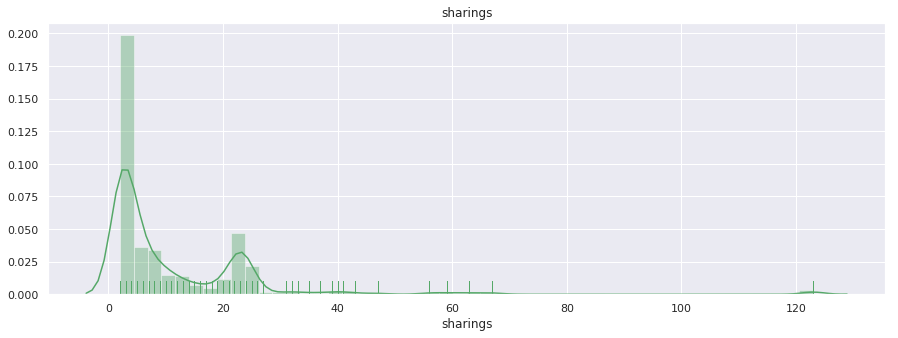

In [168]:
plt.figure(figsize=(15, 5))
plt.title('sharings')
sns.distplot(df[df['sharings'] > 1]['sharings'], rug = True, kde = True, color = 'C2')
plt.show()

# Most active users

In [169]:
df['text'] = [str(m) for m in df['text']]

def getUserData(df,users):
    '''
    Creates a DataFrame with most active users information
    Input: DataFrame with all data, number of users desired
    Output: DataFrame with number of messages, number of texts, number of midia files, ddd, ddi, state, country and all texts
    '''
    texto = []
    midia = []
    pais = []
    estado = []
    ddd = []
    ddi = []
    msg_str = []
    for user in users.index:
        texto.append(len(df[(df['id'] == user) & (df['midia']==0)]))
        midia.append(len(df[(df['id'] == user)]) - len(df[(df['id'] == user) & (df['midia']==0)]))
        pais.append(df[df['id']==user].iloc[0]['country'])
        estado.append(df[df['id']==user].iloc[0]['state'])
        ddd.append(df[df['id']==user].iloc[0]['ddd'])
        ddi.append(df[df['id']==user].iloc[0]['ddi'])
        msgs = df[(df['id']==user) & (df['midia']==0)]['text']
        msgs = list(msgs.values)
        msgs = " <-> ".join(msgs)
        msg_str.append(msgs)
        
    topUsers = pd.DataFrame({'id':user, 'count messsages':users.values, 
                             'texts':texto, 'midia':midia,
                             'ddi':ddi,'ddd':ddd,'country':pais,
                             'state':estado,'messages':msg_str})    
    return topUsers
    

def getTopUsers(df,top=20):
    groupedByid = df.groupby(['id']).count()
    groupedByid = groupedByid.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByid)

topUsers = getTopUsers(df,10)
topUsers

,id,count messsages,texts,midia,ddi,ddd,country,state,messages
0,-5767688667243973710,2275,2187,88,55,47,BRASIL,Santa Catarina,"Garanhus (PE) – No dia 23 de março, o 71o Batalhão de Infantaria Motorizado, braço do Comando Conjunto Nordeste na cidade de Garanhus, recebeu a visita de uma equipe técnica da Secretaria Municipa..."
1,-5767688667243973710,1948,1620,328,55,19,BRASIL,São Paulo,Cumplicidade significa dividir com alguém especial algo que não conseguimos guardar para nós mesmos. É confiar àquela pessoa os segredos mais ocultos. É você poder ter o apoio dela em coisas que n...
2,-5767688667243973710,1451,1288,163,55,33,BRASIL,Minas Gerais,Não senti o perfume <-> 💓💓💓 <-> Triste pq queria carinho porém vcs ficaram contra mim <-> Roubada com sucesso <-> 👏🏾👏🏾👏🏾👏🏾👏🏾 <-> Só cadim de drama pra valorizar <-> Pois é <-> Calma anjo <-> Bundi...
3,-5767688667243973710,1386,621,765,55,85,BRASIL,Ceará,Além de queda... coice!!!!... 👇🏼👇🏼👇🏼 <-> Excelente site muito completo para saber se podemos ou não sair de casa. Recomendo.\n\nhttps://www.possosairdecasa.pt/ <-> PCRJ jogando areia na cara de qu...
4,-5767688667243973710,1206,1200,6,55,92,BRASIL,Amazonas,"😌🍂👏🏻 🍃💞- Eu Posso Ter O Defeito Que For , Mais Sei Da Valor a Quem Merece . Idade não define Maturidade, Assim como Beleza não define Conteudo. Aprenda uma coisa: 🍃💞Quem muito escolhe , um dia vir..."
5,-5767688667243973710,1197,1119,78,55,31,BRASIL,Minas Gerais,"Essa gosta dos 50 tons tons <-> 😂 <-> Vc viu ? <-> 😱😂 <-> Eita eu? <-> Eu to suave <-> Tô fazendo nada <-> Não tô em cima não tô do lado 😒, viuuuuu <-> 😂😂😂😂 <-> 😉 vc sempre procura em cima e tô s..."
6,-5767688667243973710,1121,801,320,55,87,BRASIL,Pernambuco,"Voltei <-> EU TAMBÉM <-> Gente, eu achei que eram umas 3 da manhã já <-> Manda ft do pau <-> porq tinham tirado meu adm?? <-> Eu não ligo se tirar, mas tira de uma vez. Fica igual retardado. <-> V..."
7,-5767688667243973710,1083,628,455,55,75,BRASIL,Bahia,Dia seja bem vindo 🍒 <-> https://chat.whatsapp.com/I8fywM0rGqdKVH8C3E1rfH <-> https://chat.whatsapp.com/B6oq5sK2OXX3GikecEd6j9 <-> Acesse este link para entrar no meu grupo do WhatsApp: https://ch...
8,-5767688667243973710,1055,95,960,55,14,BRASIL,São Paulo,"Oi gente <-> Posso me apresentar com foto? <-> Só com mulheres, não insista amigo.😎✋🏻👍🏻 <-> Sentar o dedo em vc, tu não me conhece, petista safado <-> Cria jeito de homem <-> Não venha ser gay pro..."
9,-5767688667243973710,1050,873,177,55,92,BRASIL,Amazonas,"BEM-VINDOS(AS)\n\n✅ POR FAVOR AO ENTRAR SE APRESENTAR COM FOTO,NOME E IDADE VOCÊS TERÁ 5 MINUTOS PRA SE APRESENTAR\nSEJA ATIVO OU SERA REMOVIDO\n\nPROIBIDO QUALQUER TIPO DE PORNOGRAFIA❌❌❌❌❌❌❌❌❌❌ <..."


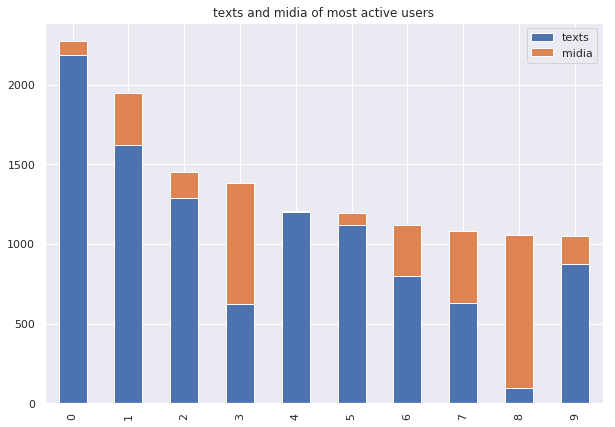

In [170]:
t = 'texts and midia of most active users'
topUsers.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Users that shared more midia
Possible bot activity

In [171]:
def getTopMidiaUsers(df,top=20):
    groupedByID = df[df['midia']==1].groupby(['id']).count()
    groupedByID = groupedByID.sort_values('date', ascending=False)[0:top]['date']
    return getUserData(df,groupedByID)

topMidia = getTopMidiaUsers(df,10)
topMidia

,id,count messsages,texts,midia,ddi,ddd,country,state,messages
0,2968434803448092995,960,95,960,55,14,BRASIL,São Paulo,"Oi gente <-> Posso me apresentar com foto? <-> Só com mulheres, não insista amigo.😎✋🏻👍🏻 <-> Sentar o dedo em vc, tu não me conhece, petista safado <-> Cria jeito de homem <-> Não venha ser gay pro..."
1,2968434803448092995,765,621,765,55,85,BRASIL,Ceará,Além de queda... coice!!!!... 👇🏼👇🏼👇🏼 <-> Excelente site muito completo para saber se podemos ou não sair de casa. Recomendo.\n\nhttps://www.possosairdecasa.pt/ <-> PCRJ jogando areia na cara de qu...
2,2968434803448092995,487,230,487,55,88,BRASIL,Ceará,E qual foi <-> Kkkkkkk <-> 🐦☕✊🏻 <-> Oque <-> 🌹🔝ɓεɱ ѵเɳ∂σ(α) ɓαɓყ🔝🌹\n\n*ᴇɴᴛʀᴏᴜ ᴠᴀɪ ʟᴏɢᴏ sᴇ ᴀᴘʀᴇsᴇɴᴛᴀɴᴅᴏ ᴄᴏᴍ➫°*\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹F❍T❍📸᭄\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹N❍MΣ✍🏻᭄\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹ID∆DΣ🔞᭄\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹CID∆DΣ🏡...
3,2968434803448092995,455,628,455,55,75,BRASIL,Bahia,Dia seja bem vindo 🍒 <-> https://chat.whatsapp.com/I8fywM0rGqdKVH8C3E1rfH <-> https://chat.whatsapp.com/B6oq5sK2OXX3GikecEd6j9 <-> Acesse este link para entrar no meu grupo do WhatsApp: https://ch...
4,2968434803448092995,450,32,450,55,64,BRASIL,Goiás,"Não sei <-> Em São Paulo, mais pode ser fake, pois no Brasil todo só tem 100 mortos <-> Usem máscara, evita bactérias. 😭👇👇👇 <-> 💫🎼💕🎶🎼🎶 <-> ""De acordo com os espíritos de luz que têm descido à Terr..."
5,2968434803448092995,441,557,441,55,99,BRASIL,Maranhão,Divulgar esta solução do hospital de Manaus para o máximo de médicos possíveis <-> Estados Unidos acabou de prender suposto homem que fabricou e vendeu o virus pra china <-> Está saindo essa notíc...
6,2968434803448092995,370,622,370,55,35,BRASIL,Minas Gerais,"Hoje é o seu aniversário e, por isso, a família está em festa! Sabemos que a maior felicidade dessa família é ter você como a nossa companheira diariamente. Obrigada por ser a nossa matriarca e a ..."
7,2968434803448092995,369,139,369,55,67,BRASIL,Mato Grosso do Sul,Entenda porque Mandetta é queridinho da mídia.\n\nhttps://www.agoraparana.com.br/noticia/heranca-maldita-mandetta-renova-contratos-de-publicidade-de-r-1bilhao-firmados-no-governo-dilma <-> China f...
8,2968434803448092995,365,636,365,55,65,BRASIL,Mato Grosso,A fds vcs <-> Talvez <-> @5527992282820 quer que eu faça oq desgraça pra tu entender que eu te amo fdp <-> Sei oq mn <-> Silêncio gada <-> Fala mn quero saber poha <-> Fica de cu doce ai sifuder <...
9,2968434803448092995,364,321,364,55,47,BRASIL,Santa Catarina,Voltei glr <-> Boa noite glr <-> Tbm acho q não é <-> Tá falando serio <-> Oiii <-> Oiii tudo bem <-> O meu não travou <-> Tá bem tranquilo <-> Oiii <-> O meu não travou <-> Tudo bem cm vcs <-> En...


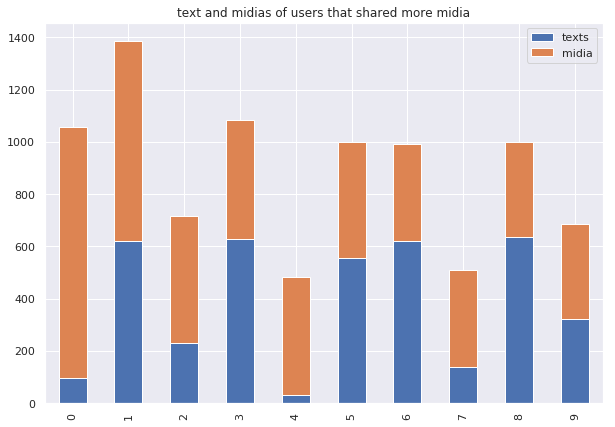

In [172]:
t = 'text and midias of users that shared more midia'
topMidia.loc[:,['texts', 'midia']].plot.bar(stacked=True, figsize=(10,7),title= t)
plt.show()

# Messages more shared in different groups

In [173]:
#df = df.groupby('domain')['ID'].nunique()
msg_group = df[df['viral']==1][['text','group']]
msg_group = msg_group.groupby('text')['group'].nunique()
msg_group = msg_group.sort_values(ascending=False)
topMsgs = msg_group[0:10]
topMsgs = topMsgs.to_frame()
topMsgs

,group
text,
"É com muita alegria que comunico que mais um pedido nosso relacionado ao Coronavírus foi atendido! O Ministério da Educação decidiu adiantar a formatura dos estudantes de Medicina, Enfermagem e outros cursos da área da Saúde para atuarem nos hospitais no enfrentamento da Covid-19! São mais de 10 mil universitários jovens e corajosos que com certeza querem se juntar às equipes médicas que atuam na linha de frente do combate ao Coronavírus!\n.\nObrigado, MEC! E eu continuo em contato com reitores de universidades e faculdades para conseguir mais apoio para essa importante iniciativa!\n\nhttps://www.instagram.com/p/B-pnWueIqL2/?igshid=1je4qpnb5hczy",25
"⚠️ATENÇÃO ⚠️\n ✅ *EMPRÉSTIMO PARA NEGATIVADO E AUTÔNOMOS*\n\n✅ *NÃO PERCA TEMPO E DESAFOGUE HOJE MESMO!*\n\n✅ *CRÉDITO NA SUA CONTA BANCARIA*\n*QUAL SUA NECESSIDADE HOJE*?\n \n✅ *Procura o empréstimo que cabe no seu bolso*?\n\n✅ *Empréstimo rápido, fácil e seguro*. \n\n\n\n👇🏽 *CONTATO COM A FINANCEIRA NO LINK*👇🏽\n\n https://wa.me/5511996977273?text=Como%20funciona%3F",25
Participe da nossa *LISTA DE TRANSMISSÃO* e receba todas as novidades do nosso mandato *EM PRIMEIRA MÃO!* É muito fácil e rápido! Basta adicionar o *número (85) 98940-1883* (http://bit.ly/3bGqT63) em seus contatos e mandar uma mensagem para o nosso *WhatsApp*. Aguardamos seu contato para juntos construirmos um *mandato participativo!*,25
"“O que mais queremos é voltar à normalidade, e o País retornar ao caminho da prosperidade”, disse Bolsonaro. O presidente da República, Jair Bolsonaro, comandou, nesta terça-feira (9), a 34a Reunião do Conselho de Governo, no Palácio da Alvorada, para tratar das medidas adotadas pelo governo durante a pandemia do novo coronavírus. Ao abrir a reunião, o presidente lamentou as mortes provocadas pela doença no País e disse esperar que logo o Brasil possa retomar a normalidade...\nhttps://dunapress.org/2020/06/09/presidente-jair-bolsonaro-reune-ministros-para-tratar-de-acoes-durante-pandemia/",24
"De muitas maneiras diferentes, a vida melhorou nas últimas décadas. Quando falamos sobre as mulheres, então, é inegável observar que suas lutas obtiveram sucesso em várias frentes, com aumento dos direitos, do acesso à educação e ao trabalho, da capacidade para independência financeira e planejamento familiar, e da prerrogativa à soberania sobre a própria sexualidade, bem estar físico e autopertencimento...\nhttps://dunapress.org/2020/06/10/indice-de-felicidade-das-mulheres/",24
"O presidente da República, Jair Bolsonaro, participou, nesta sexta-feira (5), da inauguração do primeiro hospital de campanha construído pelo Governo Federal para atender pacientes com Covid-19. A unidade fica em Águas Lindas de Goiás (GO). O hospital será mantido pelo governo de Goiás, que custeará insumos e equipe, e vai atender a demanda de pelo menos sete municípios goianos localizados na região chamada de entorno do Distrito Federal, com população estimada de 1,2 milhão de habitantes...\nhttps://dunapress.org/2020/06/10/presidente-jair-bolsonaro-participou-da-inauguracao-de-hospital-de-campanha-em-goias-para-pacientes-com-covid-19/",24
"Em reunião com o presidente da República Jair Bolsonaro, ministros e com o Colégio Nacional de Secretários de Segurança Pública (Consesp) nesta quarta-feira (10), o ministro da Justiça e Segurança Pública, André Mendonça, defendeu a união de esforços e a integração para alcançar resultados positivos na segurança pública. O ministro destacou que os pilares da atuação são a gestão do conhecimento e a gestão da informação...\nhttps://dunapress.org/2020/06/11/andre-mendonca-se-reune-com-presidente-bolsonaro-e-colegio-nacional-de-secretarios-de-seguranca-publica/",24
"O ministro da Ciência, Tecnologia, Inovações e Comunicações, Marcos Pontes, afirmou, nesta terça-feira (9), que foram iniciados os novos testes com o vermífugo nitazoxanida em pacientes que tenham sido infectados pelo novo coronavírus. A novidade é que a partir de agora pacientes assintomáticos também ser

# Viral messages
Possible misinformation

In [174]:
groupedByMsg = df[(df['midia'] == 0) & (df['text'] != 'Aguardando esta mensagem') & 
                  (df['text'] != 'Mensagem incompatível') & 
                  (df['text'] != 'Esta mensagem foi apagada') & (df['text'] != 'nan') & 
                  (df['words'] > 3)].groupby(['text']).count()
groupedByMsg = groupedByMsg.sort_values('date', ascending=False)['id']
groupedByMsg = pd.DataFrame(groupedByMsg)
groupedByMsg = groupedByMsg.rename(columns={'id':'count'})
groupedByMsg = groupedByMsg[groupedByMsg['count'] > 1]
groupedByMsg[0:10]

count
text                                                                                                                                                                                                           
CRUSH E MINHA PIKAAAAAA KKKKK                                                                                                                                                                               186
BEM-VINDOS(AS)\n\n✅ POR FAVOR AO ENTRAR SE APRESENTAR COM FOTO,NOME E IDADE VOCÊS TERÁ 5 MINUTOS PRA SE APRESENTAR\nSEJA ATIVO OU SERA REMOVIDO\n\nPROIBIDO QUALQUER TIPO DE PORNOGRAFIA❌❌❌❌❌❌❌❌❌❌          123
Não manda link dessa bosta no meu grupo não seu corno                                                                                                                                                        67
╔═══════════╗ ╔═╝███████████╚═╗ ╔╝███████████████╚╗ ║█████████████████║ ║█████████████████║ ║█████████████████║ ║█╔█████████████╗█║ ╚╦╝███▒▒███▒▒███╚╦╝ ╔╝██▒▒▒▒███▒▒▒▒██╚╗ ║██▒▒▒▒▒███▒▒▒▒▒██║ ║██▒▒...     63
Fiquem atentos às regras do grupo..💯%PuTaRiA CoM LiMiTe🔞\n\n✅Ao entrar pelo link é obrigatório apresentação com...Foto...Nome...Idade..Cidade Etc..\n✅Obrigatório respeito smp com os membros caso co...     59
🌹🔝ɓεɱ ѵเɳ∂σ(α) ɓαɓყ🔝🌹\n\n*ᴇɴᴛʀᴏᴜ ᴠᴀɪ ʟᴏɢᴏ sᴇ ᴀᴘʀᴇsᴇɴᴛᴀɴᴅᴏ ᴄᴏᴍ➫°*\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹F❍T❍📸᭄\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹N❍MΣ✍🏻᭄\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹ID∆DΣ🔞᭄\n\n🔥፝⃟ ፝⃟ঔৣ͜͡🌹CID∆DΣ🏡᭄\n\n🔝 *5 ᴍɪɴᴜᴛᴏs ᴏᴜ ʙᴀɴ*🔝\n_ᴄᴏʟᴏᴄᴀ ᴏ sɪᴍʙᴏʟᴏ ...     56
A onça vem beber água, as capivaras que corram.\n👇🏻👇🏻👇🏻👇🏻👇🏻👇🏻👏🏻👏🏻\n\n*CARTA BOMBÁSTICA POSTADA NO "BRASIL PELO EXARNET",  BLOG FECHADO DO EXÉRCITO.*\n\nMeus amigos de trincheiras, em um momento de ...     47
Bom dia a todos                                                                                                                                                                                              47
🦄🦋🐾👑Amizade 2020👑🐾🦋🦄\n*~✍️entro se apresentar como~*\nNome ,\ncidade ,\nidade \n,foto.\n😍❤️ Liberado❤️💞\n🌼Bate papo\n🌼Figurinhas👩🌾\n🌼Vídeos🌻🌸\n🌼Musica\n🌼Gifs🍂\n💞🌼 Brincadeiras\nZueiras\nPergunta\nP...     43
*:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:* \n🚛 *TIRE SUA HABILITAÇÃO* 🚚\n*CLICK NESTE LINK ABAIXO PARA SER ATENDIDO👇👇👇*\n\n*https://api.whatsapp.com/send?phone=5519971162376*\n...     41

In [175]:
len(groupedByMsg)

3852

# Identical messages shared by the same user
Possible bot activity

In [176]:
#BOT
#Número de vezes que um mesmo usuário compartilha a mesma mensagem
groupedByMsgAndID = df[(df['midia'] == 0) & (df['characters'] > 10)].groupby(['id','text']).count()
groupedByMsgAndID = pd.DataFrame(groupedByMsgAndID.sort_values('date', ascending=False)['date'])
groupedByMsgAndID = groupedByMsgAndID.rename(columns={'date':'count'})
groupedByMsgAndID[groupedByMsgAndID['count'] > 5][0:10]

count
id                   text                                                                                                                                                                                                           
-8393154485610540913 https://pt.pornhub.com/view_video.php?viewkey=ph5e82503462957                                                                                                                                               236
 5306806731986410265 CRUSH E MINHA PIKAAAAAA KKKKK                                                                                                                                                                               186
-6083126200078080867 https://chat.whatsapp.com/C9ozW8OpJjIDRa7L7pI5eH                                                                                                                                                             80
-5767688667243973710 BEM-VINDOS(AS)\n\n✅ POR FAVOR AO ENTRAR SE APRESENTAR COM FOTO,NOME E IDADE VOCÊS TERÁ 5 MINUTOS PRA SE APRESENTAR\nSEJA ATIVO OU SERA REMOVIDO\n\nPROIBIDO QUALQUER TIPO DE PORNOGRAFIA❌❌❌❌❌❌❌❌❌❌           74
-5953543705591355193 Não manda link dessa bosta no meu grupo não seu corno                                                                                                                                                        67
-7301534101368288657 ╔═══════════╗ ╔═╝███████████╚═╗ ╔╝███████████████╚╗ ║█████████████████║ ║█████████████████║ ║█████████████████║ ║█╔█████████████╗█║ ╚╦╝███▒▒███▒▒███╚╦╝ ╔╝██▒▒▒▒███▒▒▒▒██╚╗ ║██▒▒▒▒▒███▒▒▒▒▒██║ ║██▒▒...     60
 6492276228937577471 Fiquem atentos às regras do grupo..💯%PuTaRiA CoM LiMiTe🔞\n\n✅Ao entrar pelo link é obrigatório apresentação com...Foto...Nome...Idade..Cidade Etc..\n✅Obrigatório respeito smp com os membros caso co...     52
-7041041530972120028 https://chat.whatsapp.com/KmBzcnn3R4OIvnCnnCarRJ                                                                                                                                                             43
-8859603790015341977 *:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:-:* \n🚛 *TIRE SUA HABILITAÇÃO* 🚚\n*CLICK NESTE LINK ABAIXO PARA SER ATENDIDO👇👇👇*\n\n*https://api.whatsapp.com/send?phone=5519971162376*\n...     41
 5028918229709430173 ME EMPRESTA NETFLIX 🌚💜                                                                                                                                                                                       40

# Identical messages shared by the same user in more than one group
Possible bot activity

In [177]:
#BOT
#Número grupos nos quais foram compartilhadas mensagens idênticas
filtering = df[(df['midia'] == 0)]
nUniqueGroupsGroupedByMsgAndID = filtering.groupby(['id','text']).nunique()
nUniqueGroupsGroupedByMsgAndID = pd.DataFrame(nUniqueGroupsGroupedByMsgAndID.sort_values('group', ascending=False)['group'])
nUniqueGroupsGroupedByMsgAndID = nUniqueGroupsGroupedByMsgAndID.rename(columns={'group':'count of groups'})
nUniqueGroupsGroupedByMsgAndID[nUniqueGroupsGroupedByMsgAndID['count of groups'] > 1][0:10]

count of groups
id                   text                                                                                                                                                                                                                     
 4225895841046874985 É com muita alegria que comunico que mais um pedido nosso relacionado ao Coronavírus foi atendido! O Ministério da Educação decidiu adiantar a formatura dos estudantes de Medicina, Enfermagem e out...               25
                     Participe da nossa *LISTA DE TRANSMISSÃO* e receba todas as novidades do nosso mandato *EM PRIMEIRA MÃO!* É muito fácil e rápido! Basta adicionar o *número (85) 98940-1883* (http://bit.ly/3bGqT63) ...               25
 901042363855487289  ⚠️ATENÇÃO ⚠️\n ✅ *EMPRÉSTIMO PARA NEGATIVADO E AUTÔNOMOS*\n\n✅ *NÃO PERCA TEMPO E DESAFOGUE HOJE MESMO!*\n\n✅ *CRÉDITO NA SUA CONTA BANCARIA*\n*QUAL SUA NECESSIDADE HOJE*?\n \n✅ *Procura o emprésti...               24
-138275815708682127  Por: MD Alessandro Loiola. Na categoria Vítimas da Estética, existe uma prateleira imensa de pessoas com uma queixa bastante curiosa: é a estante das Pessoas que Engordam Sem Comer – ou PESC, para ...               23
                     O que fazer com os remédios que não estão mais em uso ou estão vencidos? Jogar no lixo de forma inadequada pode trazer prejuízos ambientais, como a contaminação do solo e da água, causando danos à ...               23
                     Para a OCDE, a recuperação da economia será lenta e parcial. A economia brasileira deve apresentar queda de 7,4% neste ano, segundo previsão da Organização para a Cooperação e Desenvolvimento Econô...               23
                     Os militares das Forças Armadas permanecem em diversas frentes de trabalho para combater o novo coronavirus e apoiar a população. Coordenados com agentes do governo, estão sendo empregados em ações...               23
                     Obrigação vale para compras com recursos de convênios com União A partir desta segunda-feira (6), os municípios brasileiros com mais de 15 mil habitantes terão de usar o pregão eletrônico para comp...               23
                     Objetivo é assegurar a continuidade do serviço de acolhimento, considerado essencial, e a segurança dos trabalhadores da rede socioassistencial. Diante do aumento do número de casos de agressão con...               23
                     O presidente da República, Jair Bolsonaro, participou, nesta sexta-feira (5), da inauguração do primeiro hospital de campanha construído pelo Governo Federal para atender pacientes com Covid-19. A ...               23

# Most shared URLs

In [178]:
def getURL(texts):
    '''
    Extratcs url from list of texts
    Input: list of texts
    Output: list of urls
    '''
    re_url = '[^\s]*https*://[^\s]*'
    urls = []
    
    for t in list(texts):
        matches = re.findall(re_url,t, flags=re.IGNORECASE)
        if matches:
            urls += matches      
            
    return urls

urls_in_text = list(df[df['url']==1]['text'])
    
urls = pd.Series(getURL(urls_in_text))
urls = urls.groupby(by=urls.values).count()
urls = urls.sort_values(ascending=False)
urls[0:10]

https://pt.pornhub.com/view_video.php?viewkey=ph5e82503462957                                                                             236
https://t.me/joinchat/Mz3K4BYfkdjIbE_UySPhxw                                                                                               89
https://chat.whatsapp.com/C9ozW8OpJjIDRa7L7pI5eH                                                                                           85
https://chat.whatsapp.com/CKEw3zdDidsF0KV8XpT2eD                                                                                           85
https://chat.whatsapp.com/FH44V91K3pb1GqnrivbYHu                                                                                           70
https://bit.ly/APOIO-DISTRITO-JB                                                                                                           65
https://peticaopublica.org/fechamento-congresso-nacional/                                                                                  61
https:

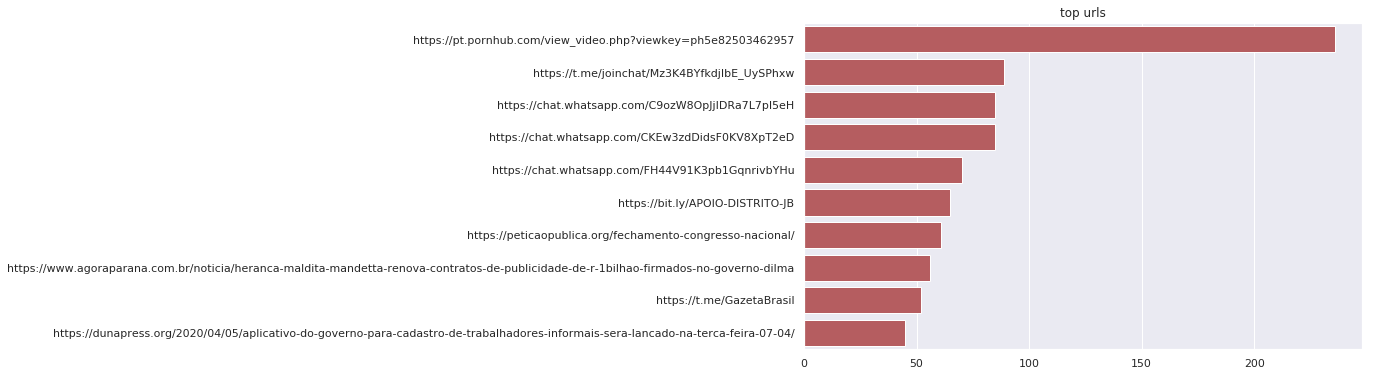

In [179]:
plt.figure(figsize=(10, 6))
plt.title('top urls')
sns.barplot(y=urls[0:10].index,x = urls[0:10].values, color = 'C3')
plt.show()

# Most frequent terms

In [180]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
stopwords = set(stopwords.words('portuguese'))

new_stopwords = ['aí','pra','vão','vou','onde','lá','aqui',
                 'tá','pode','pois','so','deu','agora','todo',
                 'nao','ja','manda','vc', 'bom', 'dia', 'ai',
                 'kkk','kkkk','ta', 'voce', 'alguem', 'ne', 'pq',
                 'cara','to','mim','la','vcs','tbm', 'tudo', 'ainda']
new_stopwords = set(new_stopwords)
stopwords.update(new_stopwords)

In [181]:
allMsgs = ' '.join(list(df[(df['midia'] == 0) & (df['words'] > 3) & 
                                  (df['characters'] < 1000) & (df['url'] == 0)]['text']))

allMsgs = ' '.join(list(df[(df['midia'] == 0) & (df['words'] > 3) & (df['url'] == 0)]['text']))
#todasMensagens = [str(m.lower()) for m in todasMensagens]

In [182]:
wordcloud = WordCloud(stopwords = stopwords, background_color="white",width = 800, height = 600).generate(allMsgs)
wordcloud.to_file('plots/'+str(base)+'/wordcloud_all_data.png')

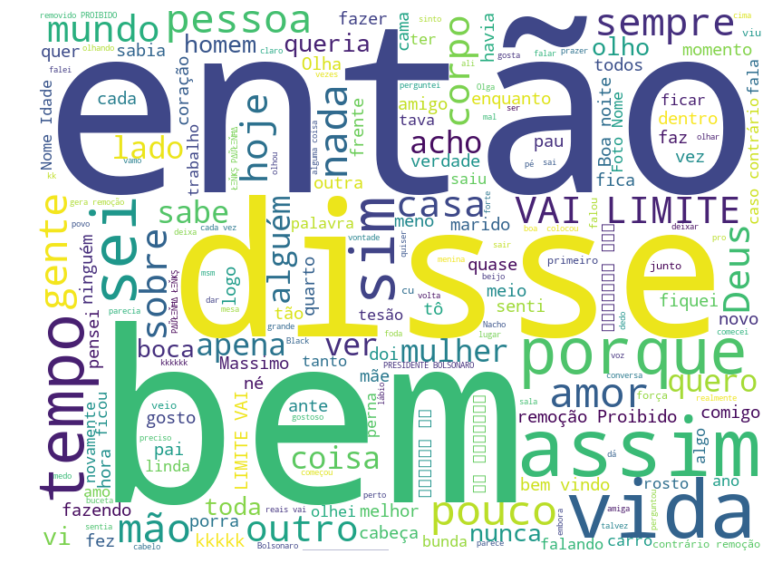

In [183]:
show = True
#plot wordcloud
if show:
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Queries

In [184]:
def haveWord(words,text):
    for word in words:
        word = word.lower()
        text = str(text).lower()
        if word in text:
            return True
    return False  

    
def haveRegex(regex,text):
    matches = re.findall(regex,text)
    if matches:
        return True
    else:
        return False

In [185]:
#messages with ther words covid, corona or coronga
queryWord = ['covid','corona','coronga']
df_query = df[df.apply(lambda x: haveWord(queryWord,x['text']),axis=1)]
print(len(df_query))
#df_query[0:10]
for m in list(df_query['text'].unique()[0:50]):
    print(m)
    print('***')

3970
http://www.poptvnews.com.br/brasil/einstein-e-sirio-libanes-recebem-autorizacao-para-usar-plasma-de-pacientes-curados-de-coronavirus-para-tratar-casos-graves
***
http://www.poptvnews.com.br/brasilia/datafolha-mesmo-com-crise-do-coronavirus-59-sao-contra-renuncia-de-bolsonaro
***
Aproveitei minha quarentena ontem (sexta-feira) e visitei uma UPA, um Pronto Socorro e o HC em Ribeirão Preto.

Pude constatar pessoalmente a FARSA do CORONAVIRUS.

Segundo uma senhora respeitada médica do HC com quem conversei longamente: "não existem estatísticas ou número de mortes POR coronavirus e sim COM coronavirus.
Ainda segundo essa médica as Úteis no segundo andar do HC estão desocupadas esperando vítimas do vírus e com apenas 3 a 4 casos de pessoas com outras doenças.

Gravei na UPA da Av. 13 de Maio (a principal de Ribeirão Preto) que está fechada e atendendo somente casos suspeitos de CORONAVIRUS em uma tenda ao lado como se fossem leprosos.

Gravei também no tradicional Pronto Socorro Municip

In [186]:
pd.set_option('display.max_colwidth', None)
df_query = df_query[df_query.apply(lambda x: not haveWord(['dunapress.org'],x['text']),axis=1)]
df_query = df_query.drop_duplicates('text')
df_query = df_query.sort_values(by='sharings', ascending = False)
#df_query[['sharings','text']].to_csv('misinformation-covid19.csv',index = False)
df_query[['sharings','text']]

,sharings,text
6656,26,Pesquisa com mais de 6.000 médicos em 30 países diz que hidroxicloroquina é o tratamento mais eficaz para coronavírus.\n\nhttps://conexaopolitica.com.br/ultimas/pesquisa-com-mais-de-6-000-medicos-em-30-paises-diz-que-hidroxicloroquina-e-o-tratamento-mais-eficaz-para-coronavirus/amp/
6645,25,"É com muita alegria que comunico que mais um pedido nosso relacionado ao Coronavírus foi atendido! O Ministério da Educação decidiu adiantar a formatura dos estudantes de Medicina, Enfermagem e outros cursos da área da Saúde para atuarem nos hospitais no enfrentamento da Covid-19! São mais de 10 mil universitários jovens e corajosos que com certeza querem se juntar às equipes médicas que atuam na linha de frente do combate ao Coronavírus!\n.\nObrigado, MEC! E eu continuo em contato com reitores de universidades e faculdades para conseguir mais apoio para essa importante iniciativa!\n\nhttps://www.instagram.com/p/B-pnWueIqL2/?igshid=1je4qpnb5hczy"
9041,23,"@ElmindoP 💯% PATRIOTA!\n*VAMOS ACORDAR BRASIL!!!! E VOCE AINDA ACREDITANDO NESTA FARSA DE COVID19, É UM GOLPE QUE FOI ARQUITETADO PARA ENGANAR OS BRASILEIROS, MENOS ESCLARECIDOS...*\n#NAOFIQUEEMCASA\n#VAMOSTRABALHAR\n#BOLSONAROESTACERTO\n\nhttps://youtu.be/qv7c0LBCZfs"
6839,23,Dra. Nise Yamaguchi integra gabinete de crise e propõe a cloroquina como tratamento imediato nos casos de coronavírus.\n\nhttps://conexaopolitica.com.br/ultimas/dra-nise-yamaguchi-integra-gabinete-de-crise-e-propoe-a-cloroquina-como-tratamento-imediato-nos-casos-de-coronavirus/
7724,23,"Herança maldita: Mandetta renova contratos de publicidade de R$ 1bilhão firmados no governo Dilma \n\nDe forma silenciosa e sem o aval do planalto, o ministro da saúde Luiz Henrique Mandetta renovou contratos de publiciade que ultrapassam R$ 1 bilhão com agências de publicidade que alimentam a mídia contra o presidente Jair Bolsonaro. \nNão é a toa, que Mandetta virou o ministro queridinho da extrema imprensa, pois o Ministério da Saúde escoa recursos para empresas de comunicação como Globo e Band que de forma orquestrada firmaram parceria em novembro com a China Media Group, estatal de comunicação do gigante asiático - braço midiático do Partido Comunista da China.\nO núcleo de jornalismo investigativo do Agora Paraná teve acesso aos contratos firmados pela licitação 02/2016 sob o comando da ex-presidente Dilma Roussef realizado pelo processo número 25000089360201568. O pregão apresenta fortes indícios de fraude. O direcionamento da licitação realizado no governo Dilma é tão explícito que as quatro empresas que foram consideradas aptas a participar do certame foram vencedoras de fatias de R$ 256 mil cada, ou seja, ultrapassando a casa de R$ 1 bilhão.\n\nDiretor de Comunicação de Mandetta comandou ASCOM do goverto do PT \n\nO contrato bilionário foi renovado de forma silenciosa, sem o aval do presidente da República em uma estratégia do chefe da Comunicação do Ministério da Saúde, Ugo Braga, que foi ligado por anos aos governos lulopetistas. O Diretor de Comunicação Social de Mandetta foi Secretário de Comunicação do governo PT no DF, comandado por Agnelo Queiroz e chegou a se desentender com uma ala petista ligada e se aliou a José Roberto Arruda, pivô do mensalão do DEM. Ugo Braga é o chefe da Comunicação do Ministério da Saúde de Mandetta, mas foi nomeado para este cargo ainda no governo Michel Temer e na mudança de governo conseguiu permanecer no cargo em um acordão com o democratas e partidos de esquerda, sem o conhecimento de Jair Bolsonaro e com aval de Mandetta.\nO ego do Ministro da saúde inflou e ele quer enfrentar o presidente Jair Bolsonaro, se escondendo atrás das mesmas mídias bancadas por ele. Mandetta está se achando o garoto propaganda do Coronavírus e sabe que sua queda é iminente, por isso aproveita cada dia para se tornar mais midiático, sem se preocupar com os empregos e com a comida na geladeira dos brasileiros.\n\nhttps://www.agoraparana.com.br/noticia/heranca-maldita-mandetta-renova-cont

# Unigrams

In [187]:
from collections import Counter

In [188]:
#processed text

#emojis and punctuation
emojis_list = list(emoji.UNICODE_EMOJI.keys()) + ['\n']
punct = list(string.punctuation)
emojis_punct = emojis_list + punct

def processEmojis(text):
    '''
    Put spaces between emojis.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        if c in emojis_list:
            text = text.replace(c, ' ' + c + ' ')
            
    text = text.replace('  ', ' ')
    return text

def removeEmojis(text):
    '''
    Remove emojis and punctuation.
    '''
    #get all unique chars
    chars = set(text)
    #for each unique char in text, do:
    for c in chars:
        if c in emojis_punct:
            text = text.replace(c,'')
            
    text = text.replace('  ', ' ')
    return text

# removing stop words
spaced_stopwords = []
for sw in stopwords:
    sw = ' '+ sw + ' '
    spaced_stopwords.append(sw)
    
def removeStopwords(text,spaced_stopwords):
    for sw in spaced_stopwords:
        text = text.replace(sw,' ')
    text = text.replace('  ',' ')
    return text

#lemmatization
# nlp = spacy.load('pt_core_news_sm')
# def lemmatization(text):
#     doc = nlp(text)
#     for token in doc:
#         if token.text != token.lemma_:
#             text = text.replace(token.text, token.lemma_)
#     return text
    

def domainUrl(text):
    '''
    Substitutes an URL in a text for the domain of this URL
    Input: an string
    Output: the string with the modified URL
    '''    
    if 'http' in text:
        re_url = '[^\s]*https*://[^\s]*'
        matches = re.findall(re_url, text, flags=re.IGNORECASE)
        for m in matches:
            domain = m.split('//')
            domain = domain[1].split('/')[0]
            text = re.sub(re_url, domain, text, 1)
        return text
    else:
        return text 

def preprocess(text):
    text = text.lower().strip()
    text = domainUrl(text)
    text = processEmojis(text)
    text = removeStopwords(text,spaced_stopwords)
    #text = lemmatization(text)
    return text

In [189]:
onlyText = list(df[(df['midia'] == 0) & (df['url'] == 0)]['text'])

In [190]:
processed_texts_filepath = data_dir + '/vis_processed_texts.p'
if not preprocessed:
    pro_texts = [preprocess(t) for t in onlyText]
    pickle.dump(pro_texts, open(processed_texts_filepath, "wb" ))
else:
    pro_texts = pickle.load(open(processed_texts_filepath, "rb" ))


In [191]:
def get_top_n_ngrams(corpus, ngram = (1,1), n=None):
    vec = CountVectorizer(ngram_range = ngram).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

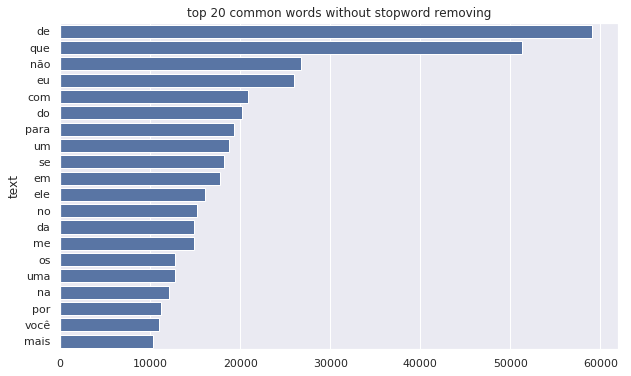

In [192]:
common_words = get_top_n_ngrams(onlyText, ngram = (1,1), n=20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common words without stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

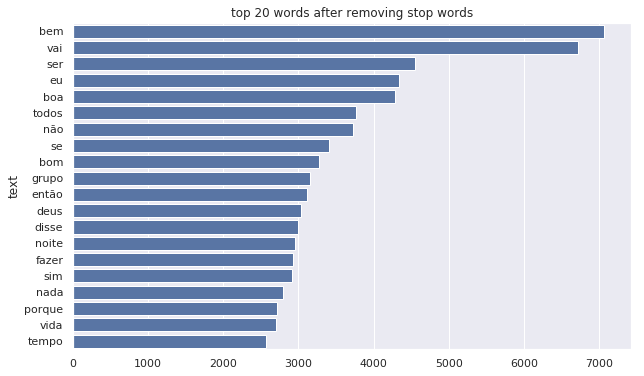

In [193]:
common_words = get_top_n_ngrams(pro_texts, ngram = (1,1), n=20)
df1 = pd.DataFrame(common_words, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 words after removing stop words')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Bigrams

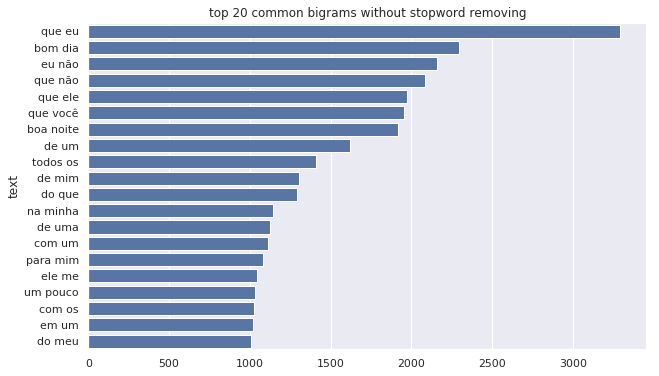

In [194]:
common_bigrams = get_top_n_ngrams(onlyText, ngram = (2,2), n=20)
df1 = pd.DataFrame(common_bigrams, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common bigrams without stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

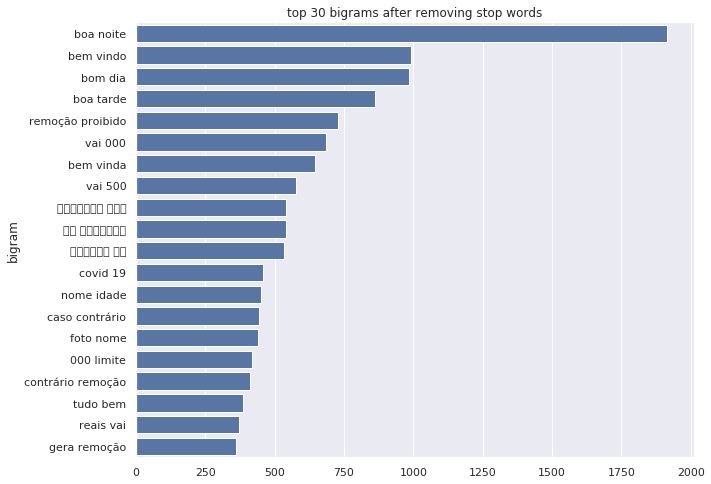

In [195]:
common_bigrams = get_top_n_ngrams(pro_texts, ngram = (2,2), n=20)
df1 = pd.DataFrame(common_bigrams, columns = ['bigram' , 'count'])
df1 = df1.groupby('bigram').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.title('top 30 bigrams after removing stop words')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Trigrams

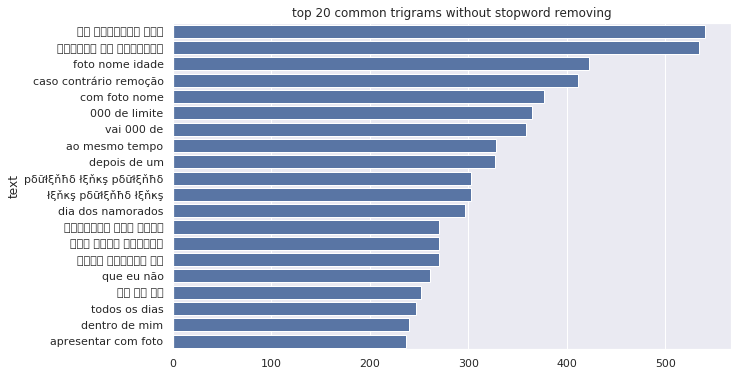

In [196]:
common_trigrams = get_top_n_ngrams(onlyText, ngram = (3,3), n=20)
df1 = pd.DataFrame(common_trigrams, columns = ['text' , 'count'])
df1 = df1.groupby('text').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common trigrams without stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

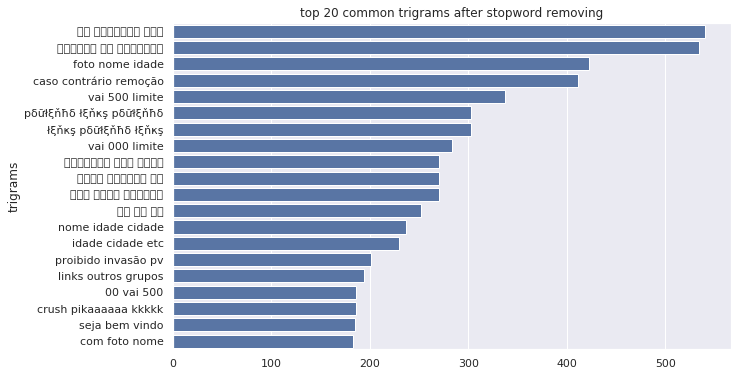

In [197]:
common_trigrams = get_top_n_ngrams(pro_texts, ngram = (3,3), n=20)
df1 = pd.DataFrame(common_trigrams, columns = ['trigrams' , 'count'])
df1 = df1.groupby('trigrams').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.title('top 20 common trigrams after stopword removing')
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Ngrams in queries

In [198]:
df_query = df[df.apply(lambda x: haveWord(queryWord,x['text']),axis=1)]
queryText = list(df_query[(df_query['midia'] == 0) & (df_query['url'] == 0)]['text'])
pro_query_text = [preprocess(t) for t in queryText]

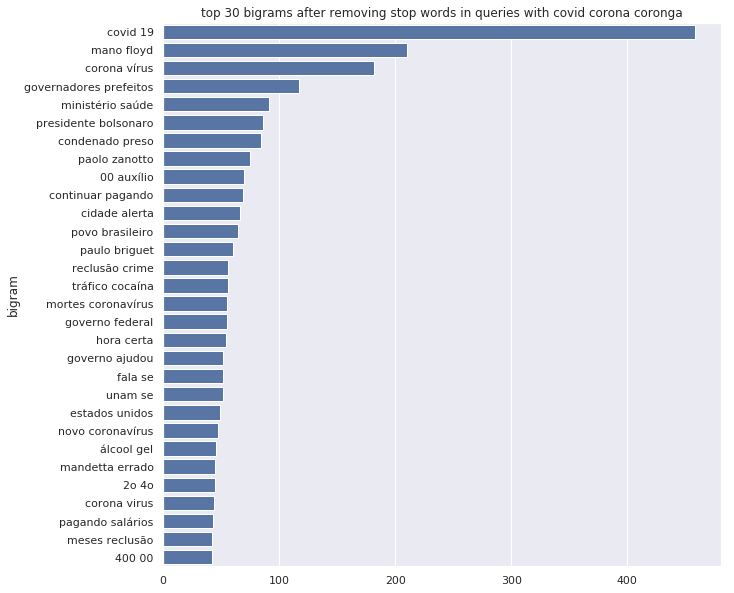

In [199]:
common_bigrams = get_top_n_ngrams(pro_query_text, ngram = (2,2), n=30)
df1 = pd.DataFrame(common_bigrams, columns = ['bigram' , 'count'])
df1 = df1.groupby('bigram').sum()['count'].sort_values(ascending=False)
plt.figure(figsize=(10, 10))
plt.title('top 30 bigrams after removing stop words in queries with ' + ' '.join(queryWord))
sns.barplot(y=df1.index,x = df1.values, color = 'C0')
plt.show()

# Words Network analysis

In [200]:
import networkx as nx

In [201]:
#[f(x) for x in sequence if condition]

pro_texts_noemoji = [removeEmojis(p) for p in pro_texts if haveWord(queryWord,p)]
input_list = ' '.join(pro_texts_noemoji).split()


def find_bigrams(input_list):
    return zip(input_list, input_list[1:])

bigrams = find_bigrams(input_list)
bigram_counts = Counter(bigrams)
print(bigram_counts.most_common(20))

[(('️', '️'), 279), (('mano', 'floyd'), 210), (('corona', 'vírus'), 179), (('governadores', 'prefeitos'), 122), (('covid', '19'), 101), (('ministério', 'saúde'), 91), (('presidente', 'bolsonaro'), 85), (('condenado', 'preso'), 84), (('paolo', 'zanotto'), 75), (('continuar', 'pagando'), 69), (('povo', 'brasileiro'), 65), (('️', 'cidade'), 64), (('cidade', 'alerta'), 64), (('paulo', 'briguet'), 60), (('tráfico', 'cocaína'), 56), (('reclusão', 'crime'), 56), (('governo', 'federal'), 55), (('hora', 'certa'), 53), (('mortes', 'coronavírus'), 51), (('estados', 'unidos'), 49)]


In [202]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),
                             columns=['bigram', 'count'])
bigram_df.head()

,bigram,count
0,"(️, ️)",279
1,"(mano, floyd)",210
2,"(corona, vírus)",179
3,"(governadores, prefeitos)",122
4,"(covid, 19)",101


In [203]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

In [204]:
d[0].items()

dict_items([(('️', '️'), 279), (('mano', 'floyd'), 210), (('corona', 'vírus'), 179), (('governadores', 'prefeitos'), 122), (('covid', '19'), 101), (('ministério', 'saúde'), 91), (('presidente', 'bolsonaro'), 85), (('condenado', 'preso'), 84), (('paolo', 'zanotto'), 75), (('continuar', 'pagando'), 69), (('povo', 'brasileiro'), 65), (('️', 'cidade'), 64), (('cidade', 'alerta'), 64), (('paulo', 'briguet'), 60), (('tráfico', 'cocaína'), 56), (('reclusão', 'crime'), 56), (('governo', 'federal'), 55), (('hora', 'certa'), 53), (('mortes', 'coronavírus'), 51), (('estados', 'unidos'), 49)])

In [205]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

/home/cabral/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



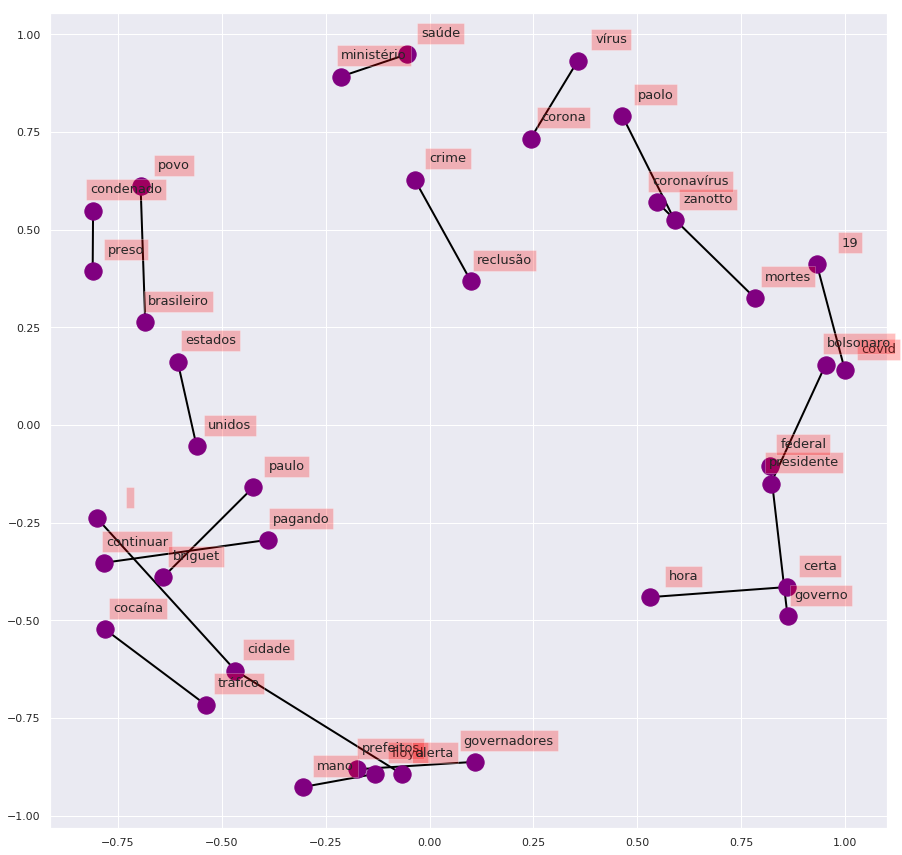

In [206]:
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=2,
                 edge_color='black',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.08, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Interactive

In [207]:
from pyvis.network import Network

In [208]:
common_words = get_top_n_ngrams(pro_texts_noemoji, ngram = (1,1), n=50)
df_freq = pd.DataFrame(common_words, columns = ['text' , 'count'])
#df_freq = df_freq.groupby('text').sum()['count'].sort_values(ascending=False)
df_freq.head()

,text,count
0,brasil,625
1,vírus,602
2,coronavírus,561
3,todos,543
4,ser,507


In [209]:
bigram_df = pd.DataFrame(bigram_counts.most_common(100),
                             columns=['bigram', 'count'])
bigram_df.tail()

,bigram,count
95,"(60, mil)",28
96,"(empresas, devem)",28
97,"(classe, média)",28
98,"(querem, brasil)",28
99,"(ilimitado, auxílio)",28


In [210]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

In [211]:
d = bigram_df.set_index('bigram').T.to_dict('records')

In [212]:
net = Network(width = '900px', height = '400px',notebook = True)
toptokens = df_freq.sort_values(by='count', ascending=False).head(50)

# Create nodes
for index, row in toptokens.iterrows():               
    net.add_node(row['text'], label=row['text'], value = row['count'])
    
# Create connections between nodes
for k, v in d[0].items():
    #k = k.split()
    if(k[0] in list(toptokens['text']) and k[1] in list(toptokens['text'])):
        net.add_edge(k[0], k[1], weight= v*100)
        print(k[0] + "," + k[1])

mano,floyd
corona,vírus
presidente,bolsonaro
mortes,coronavírus
vírus,corona
vai,ser
pandemia,coronavírus
governo,bolsonaro
vai,ter


In [213]:
net = Network(width = '1000px', height = '800px',notebook = True)
toptokens = df_freq.sort_values(by='count', ascending=False).head(50)
    
# Create connections between nodes
for k, v in d[0].items():
    net.add_node(k[0], label = k[0], value = v)
    net.add_node(k[1], label = k[1], value = v)
    net.add_edge(k[0], k[1], weight= v*100)
    #print(k[0] + "," + k[1])

In [214]:
# net.set_options(
#     var options = {
#       "physics": {
#         "repulsion": {
#           "nodeDistance": 100
#         },
#         "maxVelocity": 6,
#         "minVelocity": 0.75,
#         "solver": "repulsion"
#       }
#     } )

In [215]:
#net.show_buttons(filter_=['physics'])
network_file = 'plots/' + base + '/network.html'
#net.save_graph(network_file)
net.show(network_file)

# Research challenges
* Misinformation detection by text
* Misinformation detection by metadata
* Misinformation spread analysis
* Bot detection
* Hate speech detection